In [63]:
# Import packages
import pandas as pd
from textblob import TextBlob
import re
import ydata_profiling as pp
import sweetviz as sv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Load the dataset
file_path = "/Users/nmn/Downloads/archive/1429_1.csv"
df = pd.read_csv(file_path)

/var/folders/48/tqx5v_cn2yz_z2tp0lfxzwww0000gn/T/ipykernel_11117/721239921.py:3: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [29]:
# Display the first few rows of the dataset
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

## Data Cleaning

In [31]:
# Keep only the necessary columns
df_filtered = df[['reviews.text', 'reviews.rating']]

# Drop rows with missing values in 'reviews.text' or 'reviews.rating'
df_filtered.dropna(subset=['reviews.text', 'reviews.rating'], inplace=True)

# Convert 'reviews.rating' to integer type
df_filtered['reviews.rating'] = df_filtered['reviews.rating'].astype(int)

# Display the first few rows of the filtered dataset
df_filtered.head()

/var/folders/48/tqx5v_cn2yz_z2tp0lfxzwww0000gn/T/ipykernel_11117/3012774807.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(subset=['reviews.text', 'reviews.rating'], inplace=True)
/var/folders/48/tqx5v_cn2yz_z2tp0lfxzwww0000gn/T/ipykernel_11117/3012774807.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['reviews.rating'] = df_filtered['reviews.rating'].astype(int)


,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5
1,great for beginner or experienced person. Boug...,5
2,Inexpensive tablet for him to use and learn on...,5
3,I've had my Fire HD 8 two weeks now and I love...,4
4,I bought this for my grand daughter when she c...,5


## Text Preprocessing

In [32]:
# Function to preprocess and clean review text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'\W', ' ', text)
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    return text

# Apply preprocessing to the review text
df_filtered['cleaned_text'] = df_filtered['reviews.text'].apply(preprocess_text)

/var/folders/48/tqx5v_cn2yz_z2tp0lfxzwww0000gn/T/ipykernel_11117/1347770142.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cleaned_text'] = df_filtered['reviews.text'].apply(preprocess_text)


In [34]:
df_filtered.head()

,reviews.text,reviews.rating,cleaned_text
0,This product so far has not disappointed. My c...,5,this product so far has not disappointed my ch...
1,great for beginner or experienced person. Boug...,5,great for beginner or experienced person bough...
2,Inexpensive tablet for him to use and learn on...,5,inexpensive tablet for him to use and learn on...
3,I've had my Fire HD 8 two weeks now and I love...,4,i ve had my fire hd 8 two weeks now and love i...
4,I bought this for my grand daughter when she c...,5,i bought this for my grand daughter when she c...


## Sentiment Analysis

In [35]:
# Function to calculate sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    # Determine sentiment polarity (-1 to 1 range)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to cleaned text
df_filtered['sentiment'] = df_filtered['cleaned_text'].apply(get_sentiment)

/var/folders/48/tqx5v_cn2yz_z2tp0lfxzwww0000gn/T/ipykernel_11117/1108251068.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sentiment'] = df_filtered['cleaned_text'].apply(get_sentiment)


In [36]:
df_filtered.head()

,reviews.text,reviews.rating,cleaned_text,sentiment
0,This product so far has not disappointed. My c...,5,this product so far has not disappointed my ch...,Positive
1,great for beginner or experienced person. Boug...,5,great for beginner or experienced person bough...,Positive
2,Inexpensive tablet for him to use and learn on...,5,inexpensive tablet for him to use and learn on...,Positive
3,I've had my Fire HD 8 two weeks now and I love...,4,i ve had my fire hd 8 two weeks now and love i...,Positive
4,I bought this for my grand daughter when she c...,5,i bought this for my grand daughter when she c...,Positive


In [37]:
# Convert sentiment to numerical values
df_filtered['sentiment_num'] = df_filtered['sentiment'].map({'Positive': 1, 'Neutral': 0, 'Negative': -1})

# Define target variable (high rating = 1 if rating >= 4, else 0)
df_filtered['high_rating'] = df_filtered['reviews.rating'].apply(lambda x: 1 if x >= 4 else 0)

/var/folders/48/tqx5v_cn2yz_z2tp0lfxzwww0000gn/T/ipykernel_11117/260521937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sentiment_num'] = df_filtered['sentiment'].map({'Positive': 1, 'Neutral': 0, 'Negative': -1})
/var/folders/48/tqx5v_cn2yz_z2tp0lfxzwww0000gn/T/ipykernel_11117/260521937.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['high_rating'] = df_filtered['reviews.rating'].apply(lambda x: 1 if x >= 4 else 0)


In [38]:
df_filtered.head()

,reviews.text,reviews.rating,cleaned_text,sentiment,sentiment_num,high_rating
0,This product so far has not disappointed. My c...,5,this product so far has not disappointed my ch...,Positive,1,1
1,great for beginner or experienced person. Boug...,5,great for beginner or experienced person bough...,Positive,1,1
2,Inexpensive tablet for him to use and learn on...,5,inexpensive tablet for him to use and learn on...,Positive,1,1
3,I've had my Fire HD 8 two weeks now and I love...,4,i ve had my fire hd 8 two weeks now and love i...,Positive,1,1
4,I bought this for my grand daughter when she c...,5,i bought this for my grand daughter when she c...,Positive,1,1


## Exploratory Data Analysis

In [50]:
df_filtered.columns

Index(['reviews.text', 'reviews.rating', 'cleaned_text', 'sentiment',
       'sentiment_num', 'high_rating'],
      dtype='object')

In [51]:
df_filtered.shape

(34626, 6)

In [52]:
df_filtered.dtypes

reviews.text      object
reviews.rating     int64
cleaned_text      object
sentiment         object
sentiment_num      int64
high_rating        int64
dtype: object

In [53]:
# Missing values
df_filtered.isna().sum() # the total number of missing values

reviews.text      0
reviews.rating    0
cleaned_text      0
sentiment         0
sentiment_num     0
high_rating       0
dtype: int64

In [54]:
# First 5 rows of the dataset
df_filtered.head()

,reviews.text,reviews.rating,cleaned_text,sentiment,sentiment_num,high_rating
0,This product so far has not disappointed. My c...,5,this product so far has not disappointed my ch...,Positive,1,1
1,great for beginner or experienced person. Boug...,5,great for beginner or experienced person bough...,Positive,1,1
2,Inexpensive tablet for him to use and learn on...,5,inexpensive tablet for him to use and learn on...,Positive,1,1
3,I've had my Fire HD 8 two weeks now and I love...,4,i ve had my fire hd 8 two weeks now and love i...,Positive,1,1
4,I bought this for my grand daughter when she c...,5,i bought this for my grand daughter when she c...,Positive,1,1


In [55]:
# Last 5 rows of the dataset
df_filtered.tail()

,reviews.text,reviews.rating,cleaned_text,sentiment,sentiment_num,high_rating
34655,This is not appreciably faster than any other ...,3,this is not appreciably faster than any other ...,Positive,1,0
34656,Amazon should include this charger with the Ki...,1,amazon should include this charger with the ki...,Neutral,0,0
34657,Love my Kindle Fire but I am really disappoint...,1,love my kindle fire but am really disappointed...,Positive,1,0
34658,I was surprised to find it did not come with a...,1,i was surprised to find it did not come with a...,Negative,-1,0
34659,to spite the fact that i have nothing but good...,1,to spite the fact that have nothing but good t...,Positive,1,0


In [56]:
# Summary statistics
df_filtered.describe()

,reviews.rating,sentiment_num,high_rating
count,34626.000000,34626.000000,34626.000000
mean,4.584561,0.859296,0.933258
std,0.735660,0.453355,0.249578
min,1.000000,-1.000000,0.000000
25%,4.000000,1.000000,1.000000
50%,5.000000,1.000000,1.000000
75%,5.000000,1.000000,1.000000
max,5.000000,1.000000,1.000000


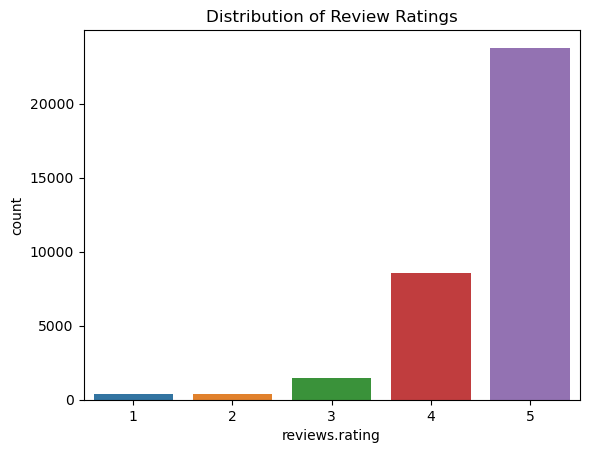

In [39]:
# Distribution of review ratings
sns.countplot(x='reviews.rating', data=df_filtered)
plt.title('Distribution of Review Ratings')
plt.show()

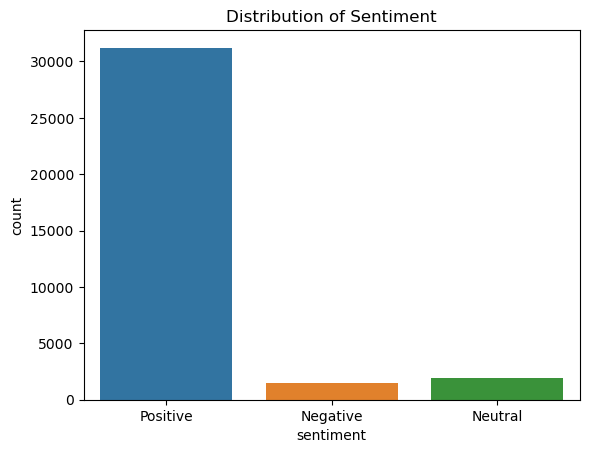

In [40]:
# Distribution of sentiment
sns.countplot(x='sentiment', data=df_filtered)
plt.title('Distribution of Sentiment')
plt.show()

In [43]:
# Correlation analysis
correlation_matrix = df_filtered[['reviews.rating', 'sentiment_num']].corr()
print(correlation_matrix)

                reviews.rating  sentiment_num
reviews.rating        1.000000       0.196656
sentiment_num         0.196656       1.000000


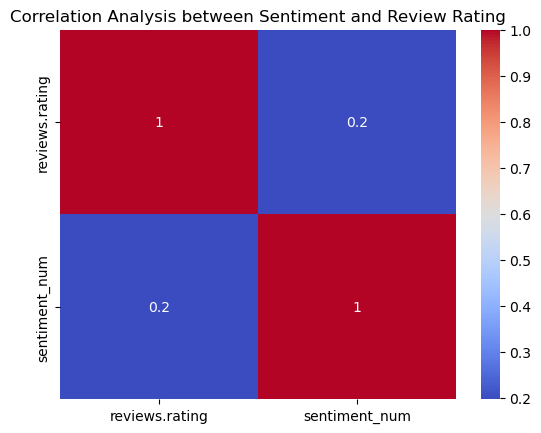

In [44]:
# Visualizing the correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis between Sentiment and Review Rating')
plt.show()

In [62]:
# Pandas Profiling
pp.ProfileReport(df_filtered)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [58]:
# SweetViz
my_report = sv.analyze(df_filtered)

                                             |      | [  0%]   00:00 -> (? left)

In [59]:
my_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Modeling: Logistic Regression

In [45]:
# Define feature and target variables
X = df_filtered[['sentiment_num']]  # Feature: sentiment score
y = df_filtered['high_rating']      # Target: high rating

In [46]:
# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Initialize and train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [48]:
# Make predictions on the test set
y_pred = log_reg.predict(X_test)

In [49]:
# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

accuracy, classification_report_output

/Users/nmn/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nmn/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nmn/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.9371931850996246,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       435\n           1       0.94      1.00      0.97      6491\n\n    accuracy                           0.94      6926\n   macro avg       0.47      0.50      0.48      6926\nweighted avg       0.88      0.94      0.91      6926\n')

## Model Interpretation and Evaluation

In [64]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

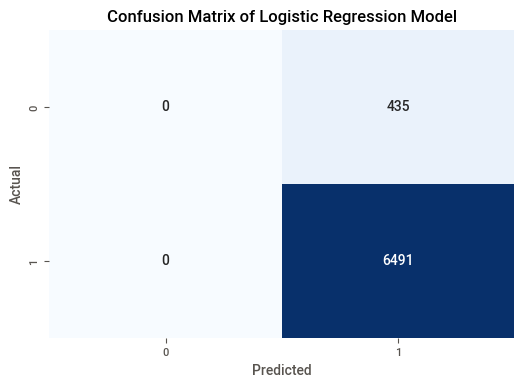

In [65]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression Model')
plt.show()

In [66]:
# Calculate and plot ROC curve
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

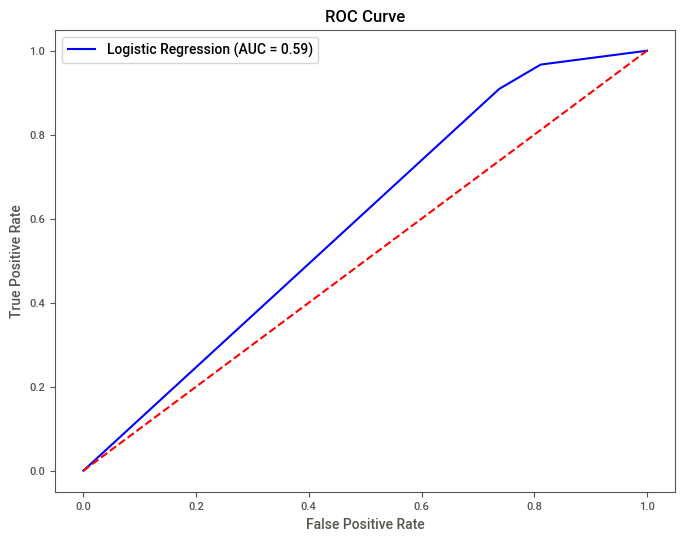

In [67]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Visualizations and Final Analysis

In [68]:
# Group by sentiment and rating to calculate count
sentiment_rating_counts = df_filtered.groupby(['reviews.rating', 'sentiment']).size().unstack()

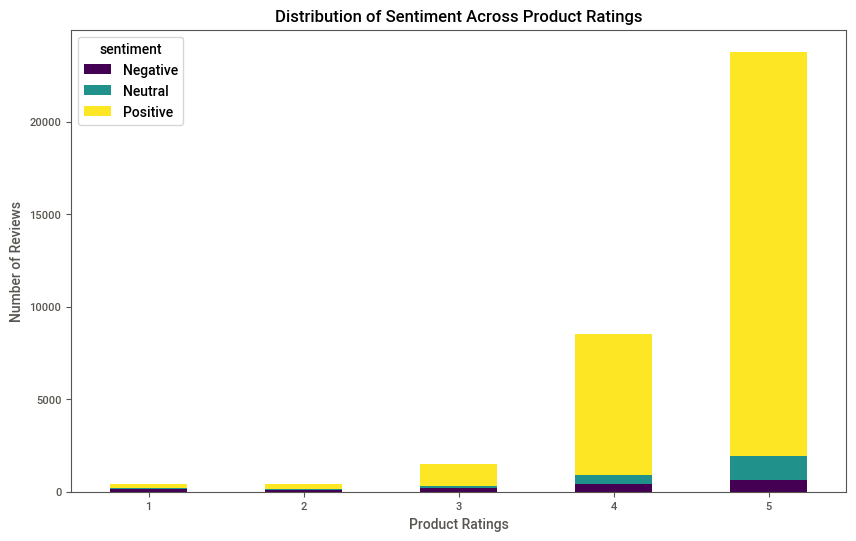

In [69]:
# Plot sentiment distribution across different ratings
sentiment_rating_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.xlabel('Product Ratings')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiment Across Product Ratings')
plt.xticks(rotation=0)
plt.show()